In [2]:
import pandas as pd
import math
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import durbin_watson
import datetime
import calendar
from scipy import stats
from matplotlib import pyplot as plt
pd.options.mode.chained_assignment = 'raise'

In [3]:
def add_month(date): # function that adds one month with the correct year/days.
    if date.month % 12 == 0:
        cur_month = 1
        cur_year = date.year + 1
        cur_day = calendar.monthrange(cur_year, cur_month)
        return datetime.date(cur_year, cur_month, cur_day[1])
    else:
        cur_month = date.month + 1
        cur_day = calendar.monthrange(date.year, cur_month)
        return datetime.date(date.year, cur_month, cur_day[1])

def subtract_year(date):
    prev_year = date.year - 1
    prev_day = calendar.monthrange(prev_year, date.month)
    return datetime.date(prev_year, date.month, prev_day[1])

In [4]:
df = pd.read_csv("market_info_forge_monthly.csv")
df.date = pd.to_datetime(df.date)
df.index = df.date # this line and following ensures we have the date as the index AND as a column
df.date = df.index

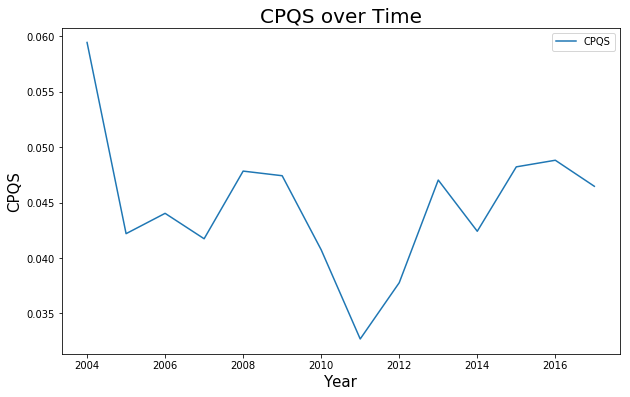

In [13]:
font = {'fontname': 'Garamond'}

time_liq = {}
plt.figure(figsize=(10,6))
for i in range(2004,2018):
    time_liq[i] = np.nanmean(df.loc[df.index.year == i]["cpqs"])

lists  = sorted(time_liq.items())

x, y = zip(*lists)
plt.plot(x,y, label = "CPQS")
plt.title("CPQS over Time", size = 20)
plt.xlabel('Year', size = 15)
plt.ylabel("CPQS", size = 15)
plt.legend(loc = 1)
plt.savefig("yearly_liq.png")
plt.show()